# Project Name - Online Retail Customer Segmentation

## Project Type- Unsupervised

### Problem Statement -
The objective of this project is to develop a customer segmentation model for an online retail business in order to gain valuable insights into the customer base and implement targeted strategies to enhance customer satisfaction, increase sales, and optimize marketing efforts. By analyzing transactional data and customer attributes such as purchasing behavior, demographics, and geographic location, the project aims to create meaningful customer segments that can drive personalized marketing campaigns, improve inventory management, and foster customer loyalty.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from prettytable import PrettyTable
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

## 1.Load the data

In [2]:
# dataset loading
df=pd.read_excel(r"C:/Users/Jyotika Phalswal/Downloads/Dataset_Identify customer segments for online retail with the use of K-means clustering\Online Retail.xlsx", sheet_name="Online Retail")

In [3]:
# dataset first view
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## 2.Understand the Data

In [4]:
# Display the first 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Dimension of the datasets
rows, columns = df.shape
print(f'The dataset has', rows, 'rows and', columns, 'columns')

The dataset has 541909 rows and 8 columns


In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# Statistical summary of the dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## 3.Clean the data

In [8]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'The total number of duplicated values in the dataset: {dup}')

The total number of duplicated values in the dataset: 5268


In [9]:
#checking for missing values
missing_values= df.isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:
# Remove all rows with missing values in CustomerID column.
df.dropna(subset = ['CustomerID'], how = 'all', inplace = True)

In [11]:
# Check for any missing values in the dataset
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# Drop all the duplicate values in the dataset
df.drop_duplicates(inplace = True)

In [13]:
# Check for any duplicate values in the dataset
df.duplicated().sum()

0

In [14]:
# Remove all the rows that starts with 'C' in InvoiceNo. Here, 'C' stands for cancellation
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]

# Check the dimension of the dataframe
df.shape

(392732, 8)

In [15]:
# Check for data types and correct if necessary
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [16]:
# Convert 'InvoiceDate' to datetime if it's not already
df.loc[:, 'InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [17]:
# Display the cleaned dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [18]:
df_cleaned = df.copy()

## 4.Transform the data

In [19]:
# Select numerical columns for standardization
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

In [20]:
# Apply standardization
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

In [21]:
# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

In [22]:
# Convert all categorical columns to strings
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype(str)

In [23]:
# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

In [24]:
# Check column names to verify the presence of 'InvoiceDate'
print(df_cleaned.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [25]:
# Convert 'InvoiceDate' to numerical features
df_cleaned['InvoiceYear'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['InvoiceDay'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['InvoiceHour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['InvoiceMinute'] = df_cleaned['InvoiceDate'].dt.minute

In [26]:
# Drop the original 'InvoiceDate' column
df_cleaned = df_cleaned.drop(['InvoiceDate'], axis=1)

In [27]:
# Ensure all data is numeric
df_cleaned.dtypes

InvoiceNo          int32
StockCode          int32
Description        int32
Quantity         float64
UnitPrice        float64
CustomerID       float64
Country            int32
InvoiceYear        int32
InvoiceMonth       int32
InvoiceDay         int32
InvoiceHour        int32
InvoiceMinute      int32
dtype: object

In [28]:
# Display the transformed dataframe
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceMinute
0,0,3233,3698,-0.039395,-0.025880,1.495283,35,2010,12,1,8,26
1,0,2643,3706,-0.039395,0.011888,1.495283,35,2010,12,1,8,26
2,0,2847,858,-0.028381,-0.016888,1.495283,35,2010,12,1,8,26
3,0,2795,1804,-0.039395,0.011888,1.495283,35,2010,12,1,8,26
4,0,2794,2763,-0.039395,0.011888,1.495283,35,2010,12,1,8,26


## 5.Feature Engineering

In [29]:
# Create a new feature: TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [30]:
# Perform feature selection
features = df_cleaned[['Quantity', 'UnitPrice', 'Country']]
target = df_cleaned['TotalPrice']
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(features, target)
selected_features = selector.transform(features)

In [31]:
# Display the scores for each feature
feature_scores = pd.DataFrame({'Feature': ['Quantity', 'UnitPrice', 'Country'], 'Score': selector.scores_})
print(feature_scores)

     Feature          Score
0   Quantity  363627.578642
1  UnitPrice  282850.326296
2    Country     126.099709


In [32]:
# Use selected features for further analysis
X = selected_features
y = target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [34]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
}

In [35]:
# Train the models and evaluate their accuracy
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = mae


In [36]:
# Print the results
for name, mae in results.items():
    print(f"{name}: MAE = {mae}")

Linear Regression: MAE = 0.0033039622588796206
Decision Tree: MAE = 0.00043546832129374747
Random Forest: MAE = 0.00028871829658943995
K-Nearest Neighbors: MAE = 0.0005116158944279578


## 6.Standardize the Data

In [37]:
# Drop rows with missing values for the columns used in clustering
df = df.dropna(subset=['Quantity', 'UnitPrice'])

In [38]:
# Standardize the features
scaler = StandardScaler()
df.loc[:, ['Quantity', 'UnitPrice']] = scaler.fit_transform(df[['Quantity', 'UnitPrice']])

In [39]:
# Feature matrix
features_matrix = df[['Quantity', 'UnitPrice']].values

In [40]:
# Display the standardized features
print(df[['Quantity', 'UnitPrice']].head())

   Quantity  UnitPrice
0 -0.039395  -0.025880
1 -0.039395   0.011888
2 -0.028381  -0.016888
3 -0.039395   0.011888
4 -0.039395   0.011888


## 7.Determine the Optimal Number of Clusters using the Elbow Method

In [41]:
# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_matrix)
    wcss.append(kmeans.inertia_)

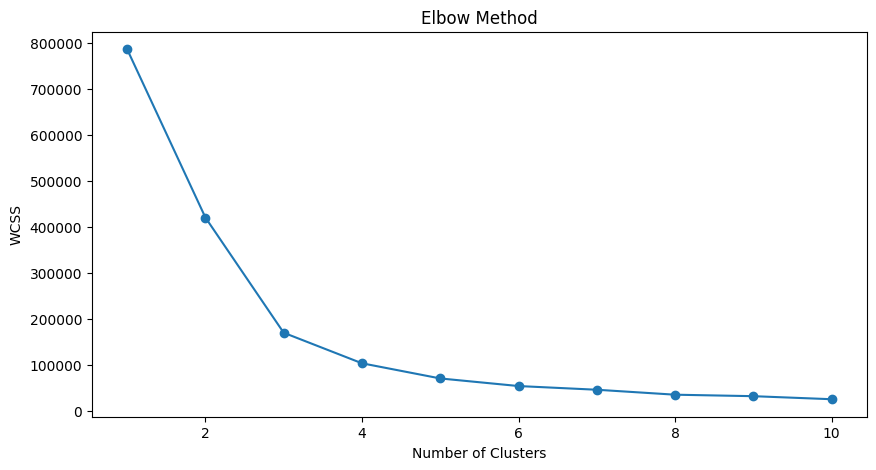

In [42]:
# Plot the WCSS against the number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

##### The determination of the optimal number of clusters using the elbow method involves identifying the point where the within-cluster sum of squares (WCSS) starts to decrease more slowly.In our case, k=3 might be the optimal choice. 

### 7.1 Run K-Means Clustering

In [43]:
# Run K-Means clustering with the optimal number of clusters
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df.loc[:,'Cluster'] = kmeans.fit_predict(features_matrix)


In [44]:
print(df['Cluster'].value_counts())

Cluster
0    392714
2        16
1         2
Name: count, dtype: int64


In [45]:
# Display the first few rows with cluster labels
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.039395   
1    536365     71053                  WHITE METAL LANTERN -0.039395   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.028381   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.039395   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.039395   

          InvoiceDate  UnitPrice  CustomerID         Country  Cluster  
0 2010-12-01 08:26:00  -0.025880     17850.0  United Kingdom        0  
1 2010-12-01 08:26:00   0.011888     17850.0  United Kingdom        0  
2 2010-12-01 08:26:00  -0.016888     17850.0  United Kingdom        0  
3 2010-12-01 08:26:00   0.011888     17850.0  United Kingdom        0  
4 2010-12-01 08:26:00   0.011888     17850.0  United Kingdom        0  


### 7.2 Visualize the clusters

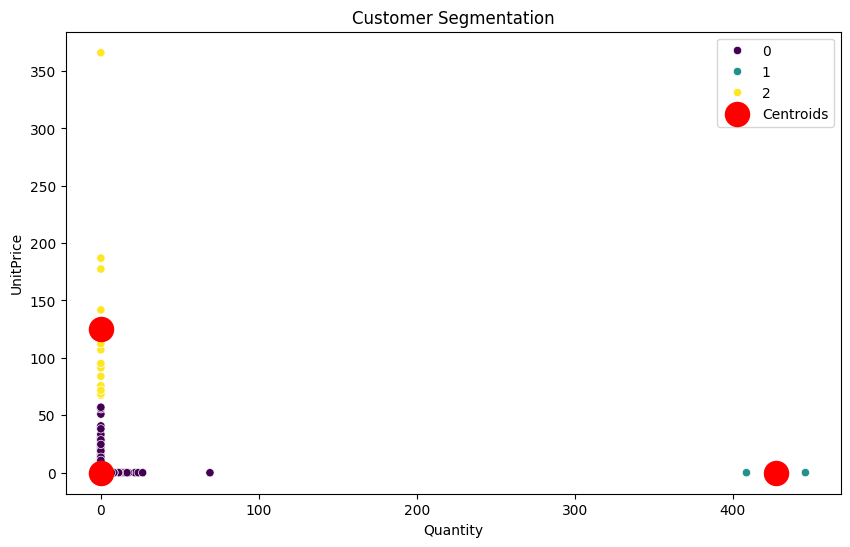

In [46]:
# Visualize the clusters using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=df, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

### 7.3 Assign Cluster Labels to the Original Data


In [47]:
original_data = pd.read_excel(r"C:/Users/Jyotika Phalswal/Downloads/Dataset_Identify customer segments for online retail with the use of K-means clustering\Online Retail.xlsx", sheet_name="Online Retail")
original_data['Cluster'] = df['Cluster']

In [48]:
# Display the first 5 rows of the dataset with cluster label
original_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0


### 7.4 Analyze Each Segment

In [49]:
cluster_summary = original_data.groupby('Cluster').agg({
    'Quantity': ['mean', 'median', 'std'],
    'UnitPrice': ['mean', 'median', 'std']
}).reset_index()

In [50]:
print(cluster_summary)

  Cluster      Quantity                          UnitPrice            \
                   mean   median          std         mean    median   
0     0.0     12.759056      6.0    47.498805     3.012349     1.950   
1     1.0  77605.000000  77605.0  4794.183976     1.560000     1.560   
2     2.0      1.000000      1.0     0.000000  2782.909375  2085.905   

                
           std  
0     8.285485  
1     0.735391  
2  1706.158796  


In [51]:
df_summary = pd.DataFrame(cluster_summary)

In [52]:
# Flatten the multi-level columns
df_summary.columns = ['Cluster', 'Mean Quantity', 'Median Quantity', 'Quantity StdDev', 
                      'Mean UnitPrice', 'Median UnitPrice', 'UnitPrice StdDev']

In [53]:
df_summary

,Cluster,Mean Quantity,Median Quantity,Quantity StdDev,Mean UnitPrice,Median UnitPrice,UnitPrice StdDev
0,0.0,12.759056,6.0,47.498805,3.012349,1.950,8.285485
1,1.0,77605.000000,77605.0,4794.183976,1.560000,1.560,0.735391
2,2.0,1.000000,1.0,0.000000,2782.909375,2085.905,1706.158796


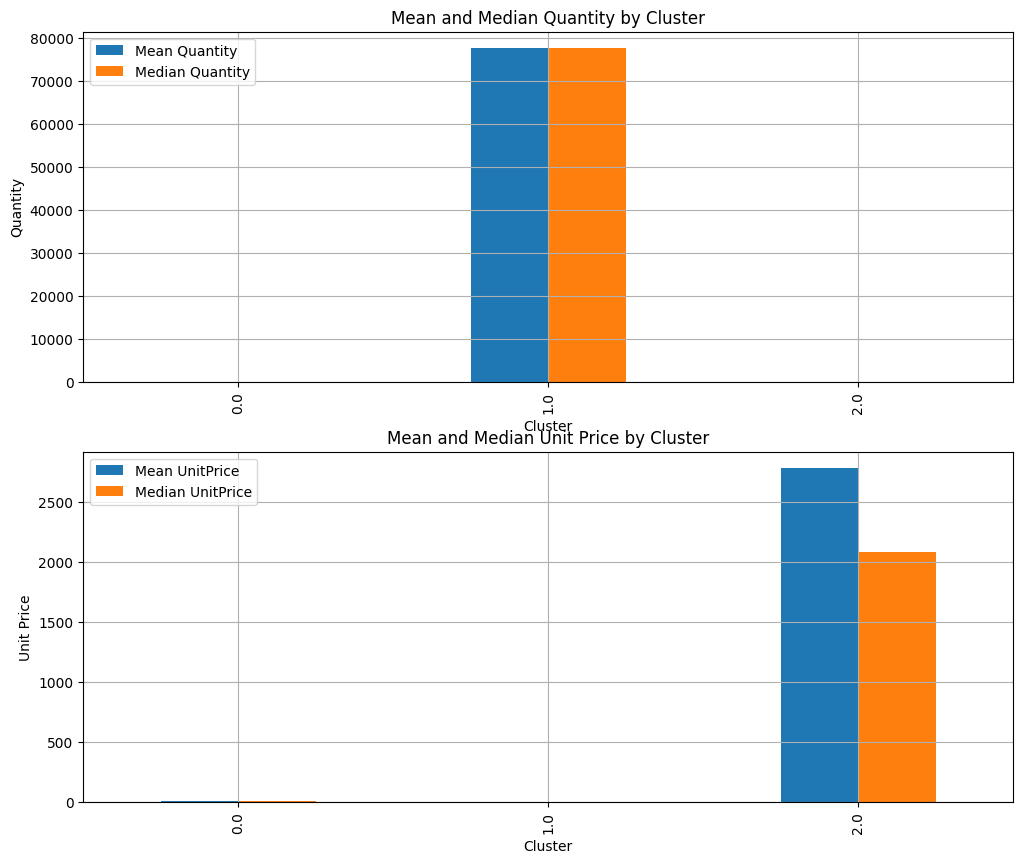

In [54]:
# Plotting Mean Quantity and Mean UnitPrice
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
df_summary.plot(kind='bar', x='Cluster', y=['Mean Quantity', 'Median Quantity'], ax=ax[0])
ax[0].set_title('Mean and Median Quantity by Cluster')
ax[0].set_ylabel('Quantity')
ax[0].legend(loc='upper left')
ax[0].grid(True)

# Plotting Mean and Median Unit Price by Cluster
df_summary.plot(kind='bar', x='Cluster', y=['Mean UnitPrice', 'Median UnitPrice'], ax=ax[1])
ax[1].set_title('Mean and Median Unit Price by Cluster')
ax[1].set_ylabel('Unit Price')
ax[1].legend(loc='upper left')
ax[1].grid(True)

### 7.5 Profile the Customer Segments

In [55]:
# Profile the Customer Segments
for cluster in original_data['Cluster'].unique():
    cluster_data = original_data[original_data['Cluster'] == cluster]
    print(f"Cluster {cluster} Profile:")
    print(f"Mean Quantity: {cluster_data['Quantity'].mean()}")
    print(f"Mean UnitPrice: {cluster_data['UnitPrice'].mean()}")
    print(f"Number of Customers: {cluster_data['CustomerID'].nunique()}")
    print("-" * 40)

Cluster 0.0 Profile:
Mean Quantity: 12.759056208844095
Mean UnitPrice: 3.0123492261544027
Number of Customers: 4337
----------------------------------------
Cluster nan Profile:
Mean Quantity: nan
Mean UnitPrice: nan
Number of Customers: 0
----------------------------------------
Cluster 1.0 Profile:
Mean Quantity: 77605.0
Mean UnitPrice: 1.56
Number of Customers: 2
----------------------------------------
Cluster 2.0 Profile:
Mean Quantity: 1.0
Mean UnitPrice: 2782.909375
Number of Customers: 9
----------------------------------------


In [56]:
data = pd.DataFrame(original_data)

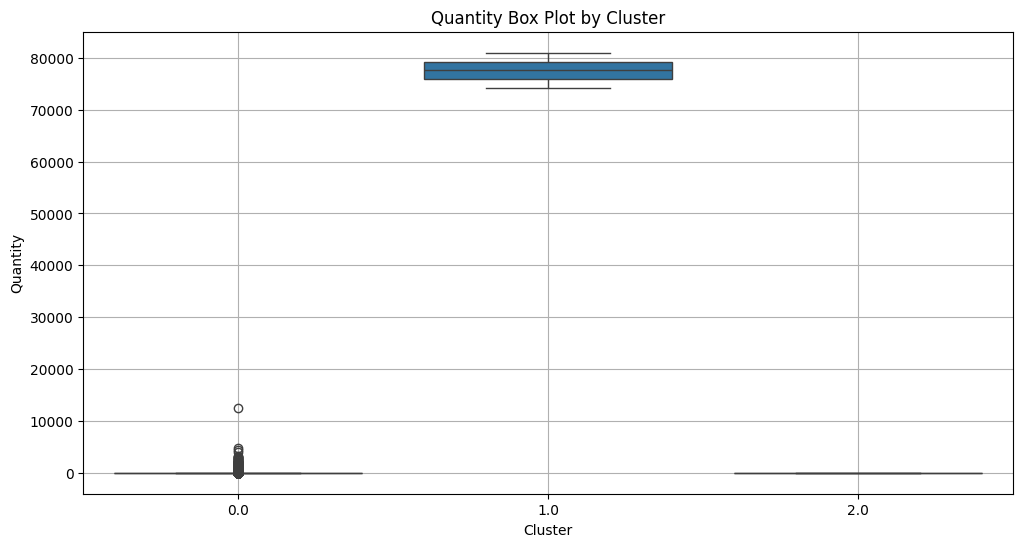

In [57]:
# Plotting Quantity Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Quantity', data=data)
plt.title('Quantity Box Plot by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

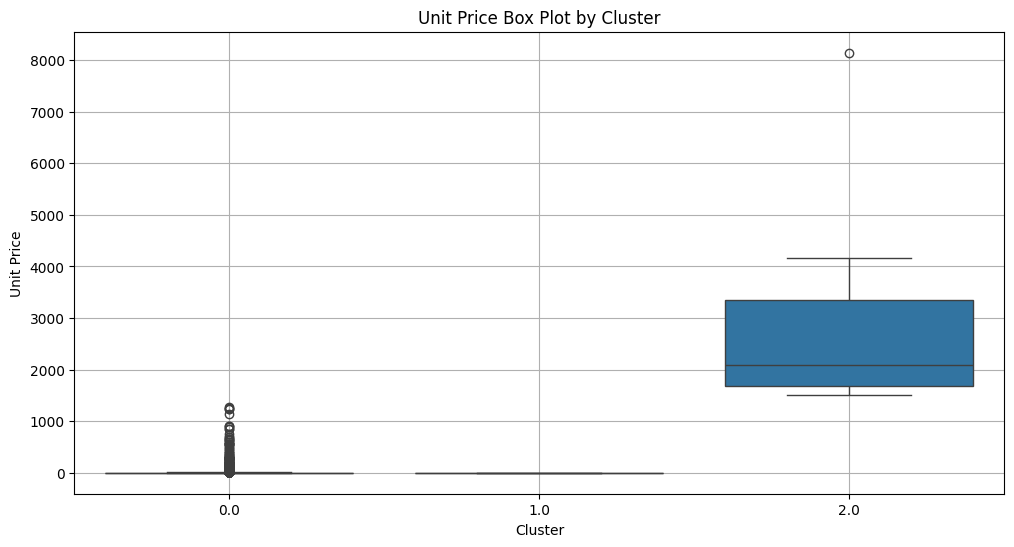

In [58]:
# Plotting UnitPrice Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='UnitPrice', data=data)
plt.title('Unit Price Box Plot by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()

## 8.DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [59]:
# Group by CustomerID to get NumPurchases
df_purchases = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_purchases.rename(columns={'InvoiceNo': 'NumPurchases'}, inplace=True)
df_cleaned = df_cleaned.merge(df_purchases, on='CustomerID')

In [60]:
print(df_cleaned.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay',
       'InvoiceHour', 'InvoiceMinute', 'TotalPrice', 'NumPurchases'],
      dtype='object')


In [61]:
# Remove rows with negative TotalPrice
df_cleaned = df_cleaned[df_cleaned['TotalPrice'] >= 0]


In [62]:
# Extract the relevant columns for clustering
customer_data = df_cleaned[['CustomerID', 'TotalPrice', 'Quantity', 'NumPurchases']].drop_duplicates(subset='CustomerID')


In [63]:
# Drop CustomerID for clustering
customer_data_scaled = customer_data[['TotalPrice', 'Quantity', 'NumPurchases']]


In [64]:
# Standardize the features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_scaled)

In [65]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.7, min_samples=3)
clusters = dbscan.fit_predict(customer_data_scaled)

In [66]:
# Add the cluster labels to the original DataFrame
customer_data['Cluster'] = clusters

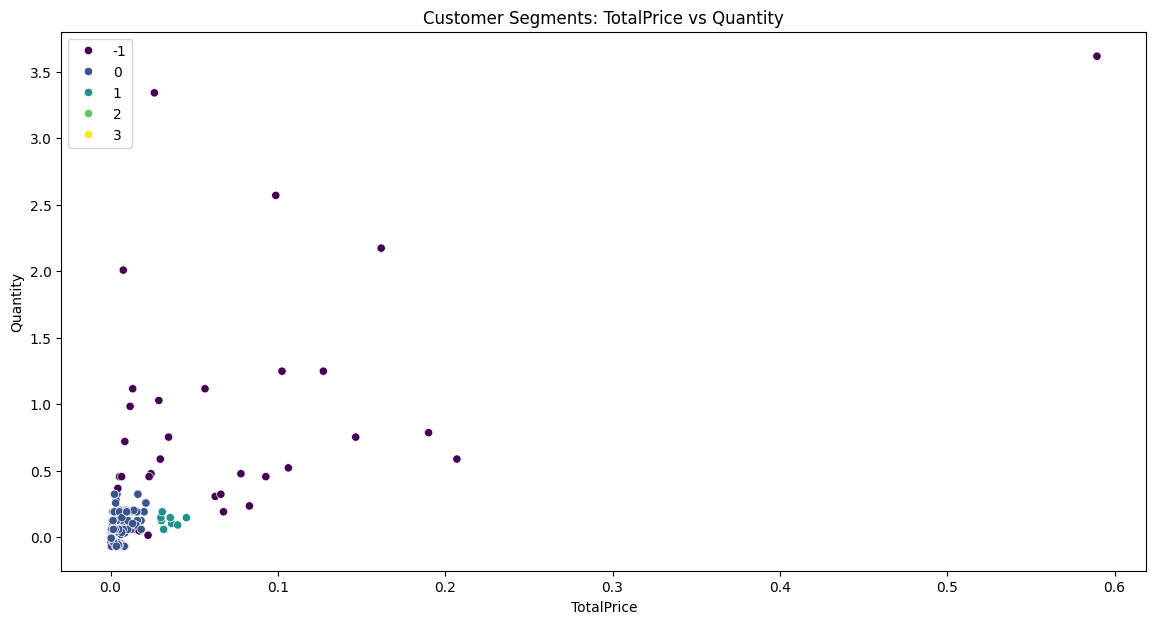

In [67]:
# Scatter plot for TotalPrice vs. Quantity
plt.figure(figsize=(14, 7))
sns.scatterplot(x='TotalPrice', y='Quantity', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segments: TotalPrice vs Quantity')
plt.xlabel('TotalPrice')
plt.ylabel('Quantity')
plt.legend()
plt.show()


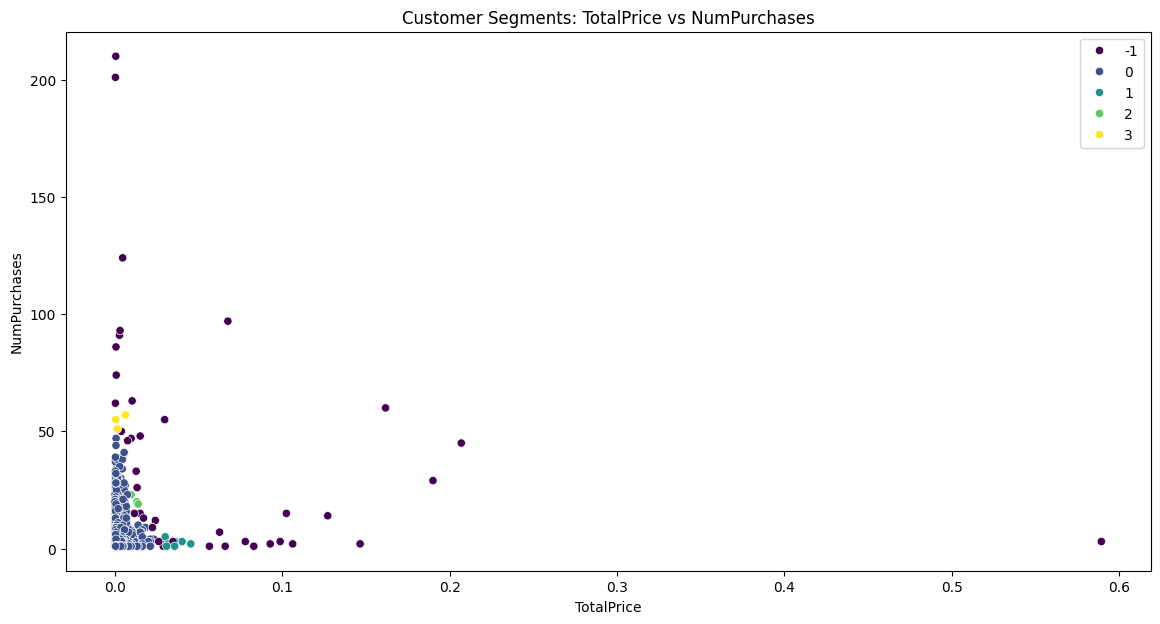

In [68]:
# Scatter plot for TotalPrice vs. NumPurchases
plt.figure(figsize=(14, 7))
sns.scatterplot(x='TotalPrice', y='NumPurchases', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segments: TotalPrice vs NumPurchases')
plt.xlabel('TotalPrice')
plt.ylabel('NumPurchases')
plt.legend()
plt.show()


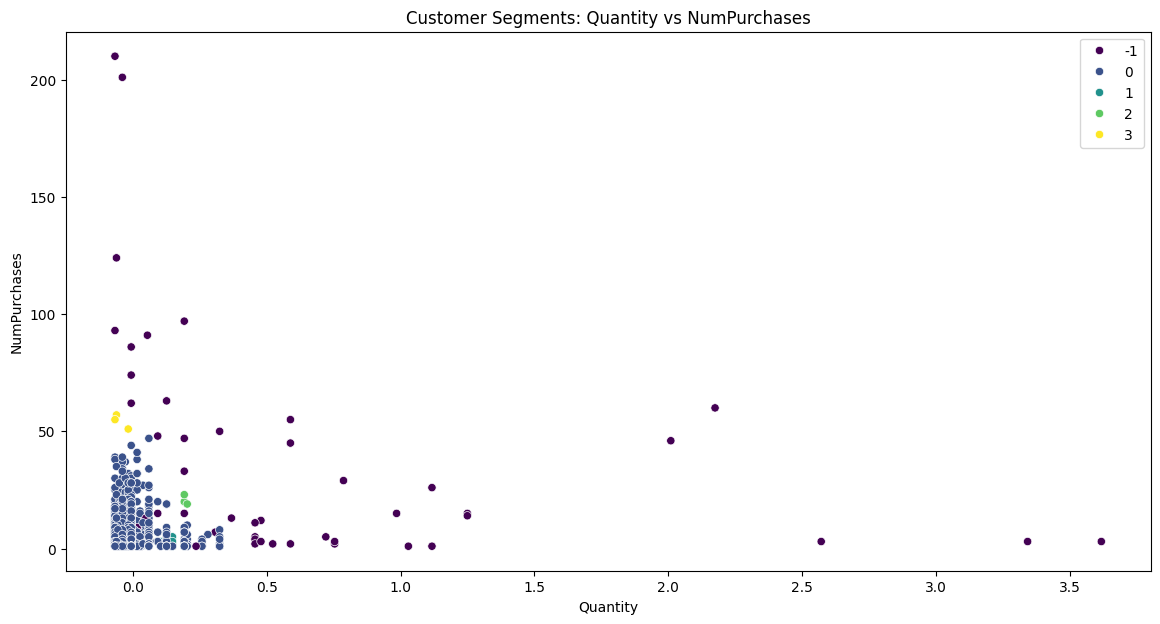

In [69]:
# Scatter plot for Quantity vs. NumPurchases
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Quantity', y='NumPurchases', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segments: Quantity vs NumPurchases')
plt.xlabel('Quantity')
plt.ylabel('NumPurchases')
plt.legend()
plt.show()

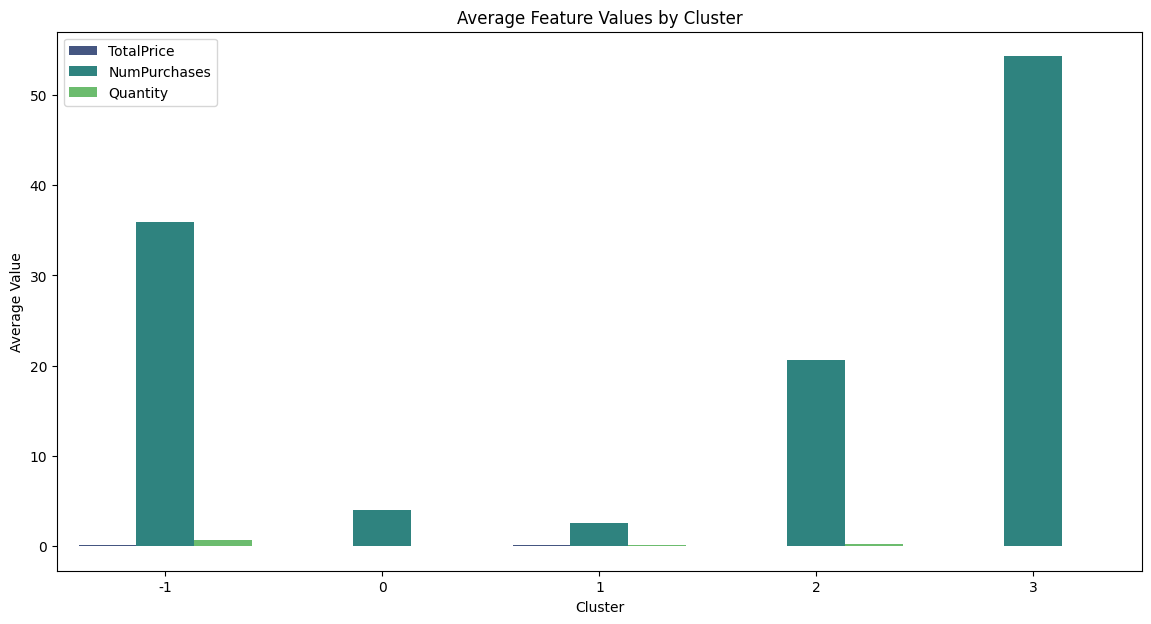

In [70]:
# Bar plot for the average values of each feature per cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'TotalPrice': 'mean',
    'NumPurchases': 'mean',
    'Quantity': 'mean'
}).reset_index()

cluster_summary_melted = pd.melt(cluster_summary, id_vars='Cluster', var_name='Feature', value_name='Average')

plt.figure(figsize=(14, 7))
sns.barplot(x='Cluster', y='Average', hue='Feature', data=cluster_summary_melted, palette='viridis')
plt.title('Average Feature Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend()
plt.show()

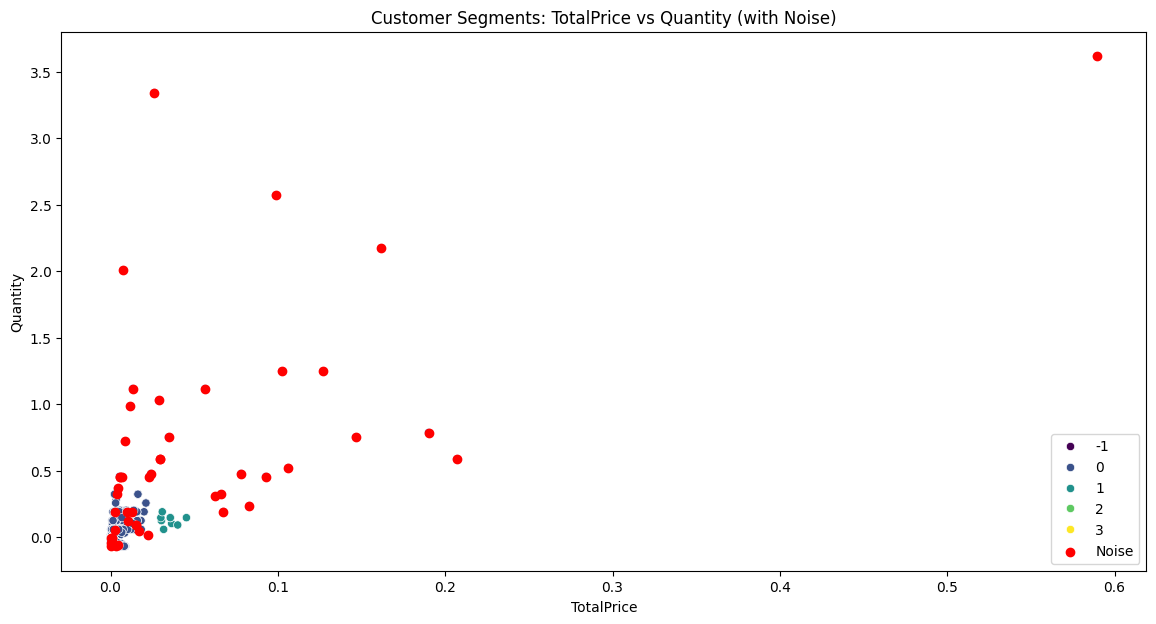

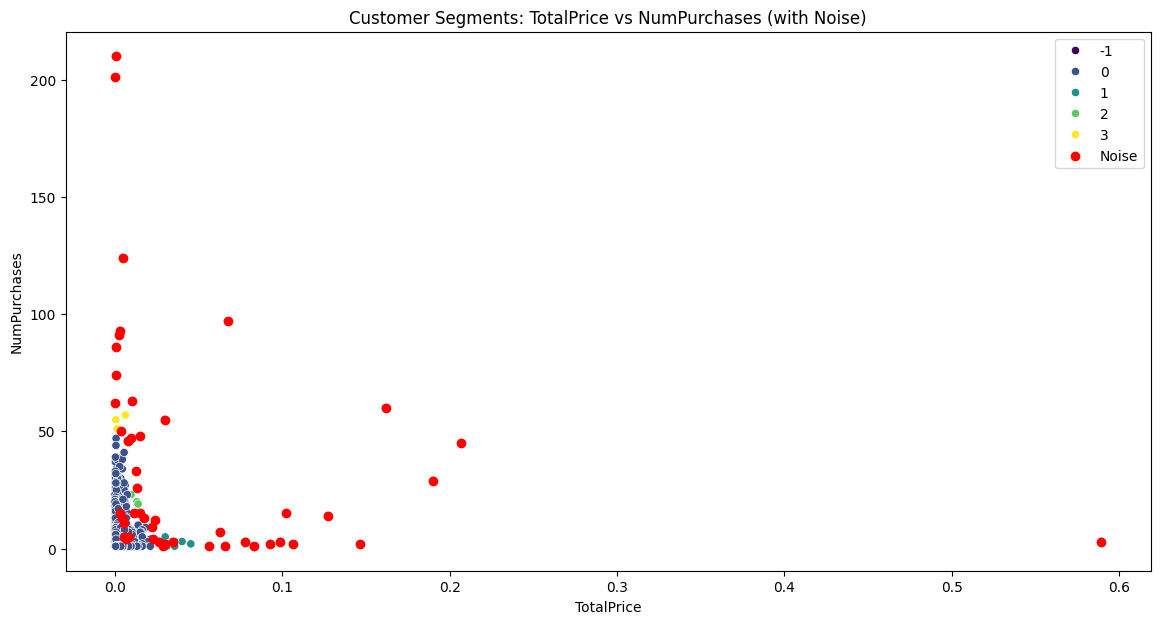

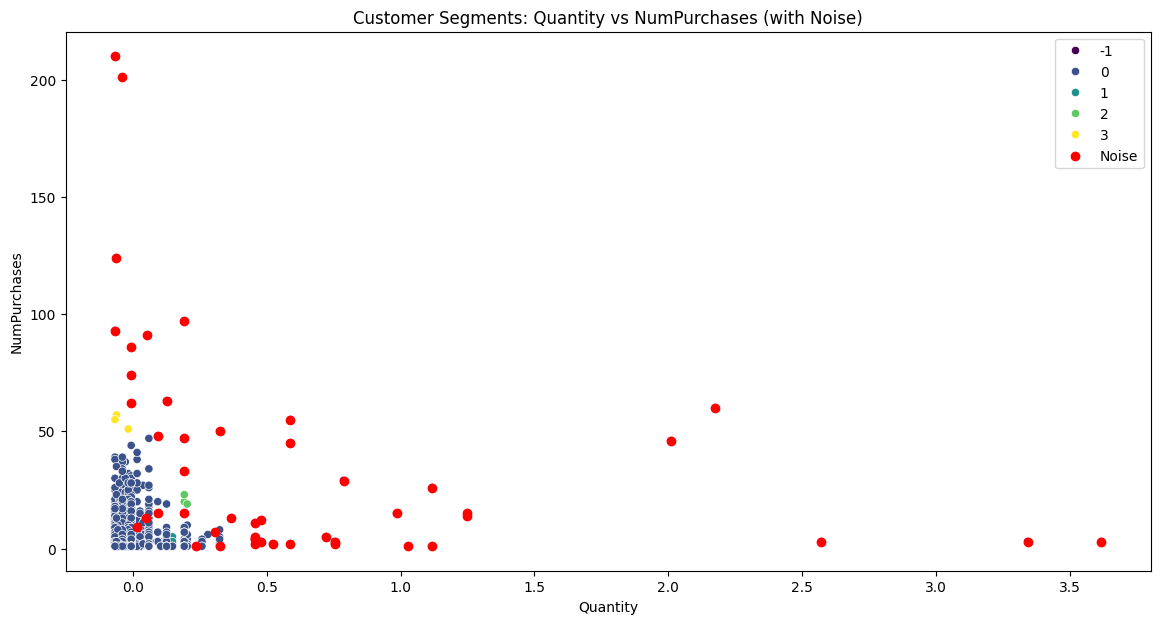

In [71]:
# Visualizing noise points (Cluster -1)
plt.figure(figsize=(14, 7))
sns.scatterplot(x='TotalPrice', y='Quantity', hue='Cluster', data=customer_data, palette='viridis')
plt.scatter(customer_data[customer_data['Cluster'] == -1]['TotalPrice'], customer_data[customer_data['Cluster'] == -1]['Quantity'], color='red', label='Noise')
plt.title('Customer Segments: TotalPrice vs Quantity (with Noise)')
plt.xlabel('TotalPrice')
plt.ylabel('Quantity')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(x='TotalPrice', y='NumPurchases', hue='Cluster', data=customer_data, palette='viridis')
plt.scatter(customer_data[customer_data['Cluster'] == -1]['TotalPrice'], customer_data[customer_data['Cluster'] == -1]['NumPurchases'], color='red', label='Noise')
plt.title('Customer Segments: TotalPrice vs NumPurchases (with Noise)')
plt.xlabel('TotalPrice')
plt.ylabel('NumPurchases')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(x='Quantity', y='NumPurchases', hue='Cluster', data=customer_data, palette='viridis')
plt.scatter(customer_data[customer_data['Cluster'] == -1]['Quantity'], customer_data[customer_data['Cluster'] == -1]['NumPurchases'], color='red', label='Noise')
plt.title('Customer Segments: Quantity vs NumPurchases (with Noise)')
plt.xlabel('Quantity')
plt.ylabel('NumPurchases')
plt.legend()
plt.show()


## 9.Agglomerative Hierarchial Clustering

In [72]:
# Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3) 
customer_data['Cluster'] = agg_clustering.fit_predict(customer_data_scaled)

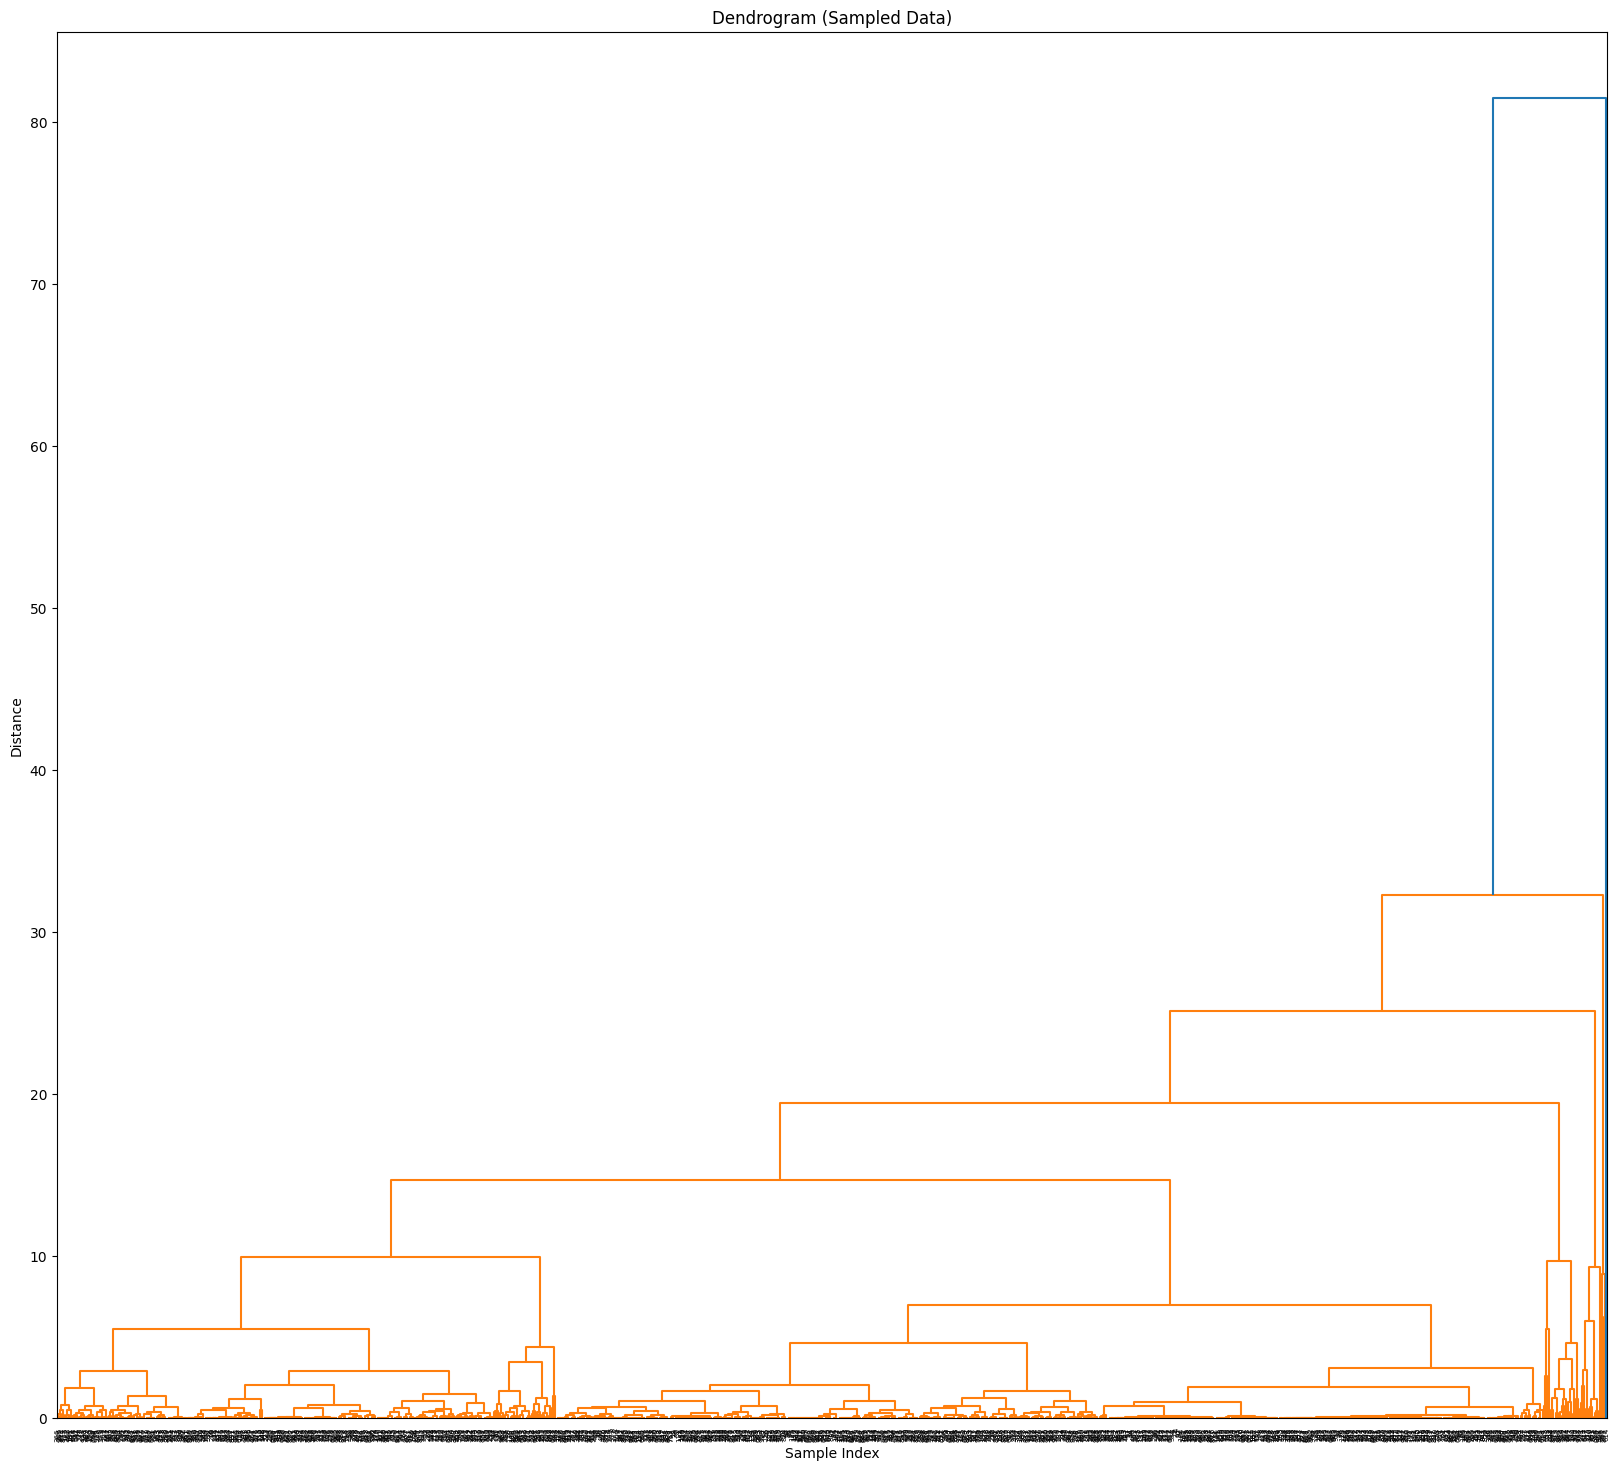

In [73]:
# Sample data for dendrogram
sampled_data = customer_data_scaled[np.random.choice(customer_data_scaled.shape[0], 1000, replace=False)]

# Plot Dendrogram
linked = linkage(sampled_data, method='ward')

plt.figure(figsize=(20,18))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram (Sampled Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

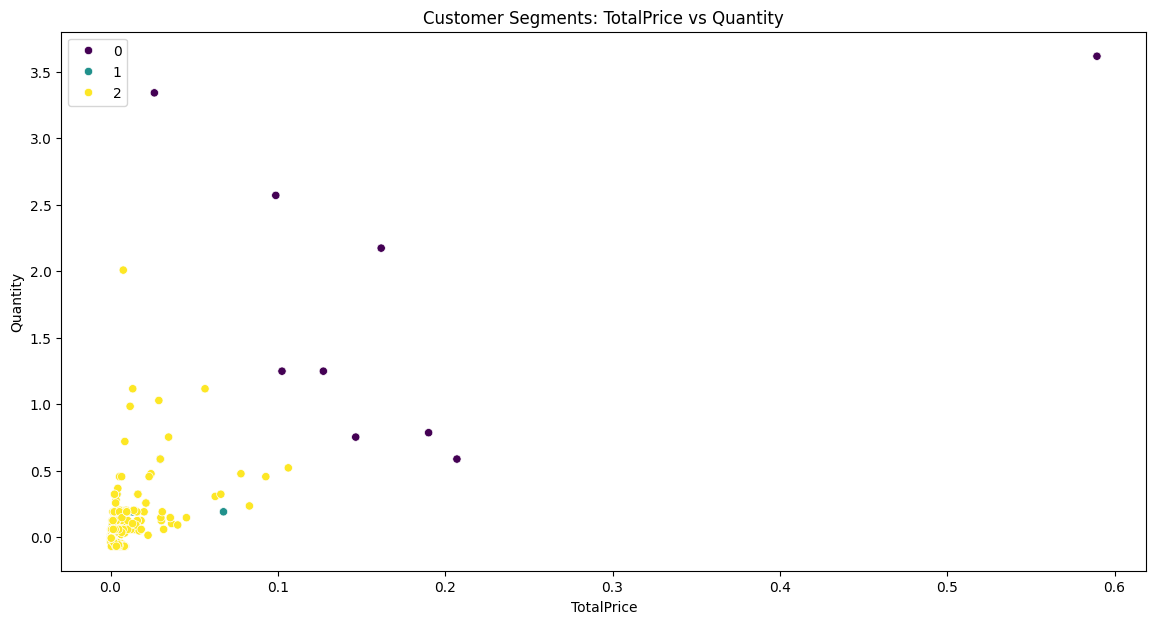

In [74]:
# Scatter plot for TotalPrice vs. Quantity
plt.figure(figsize=(14, 7))
sns.scatterplot(x='TotalPrice', y='Quantity', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segments: TotalPrice vs Quantity')
plt.xlabel('TotalPrice')
plt.ylabel('Quantity')
plt.legend()
plt.show()

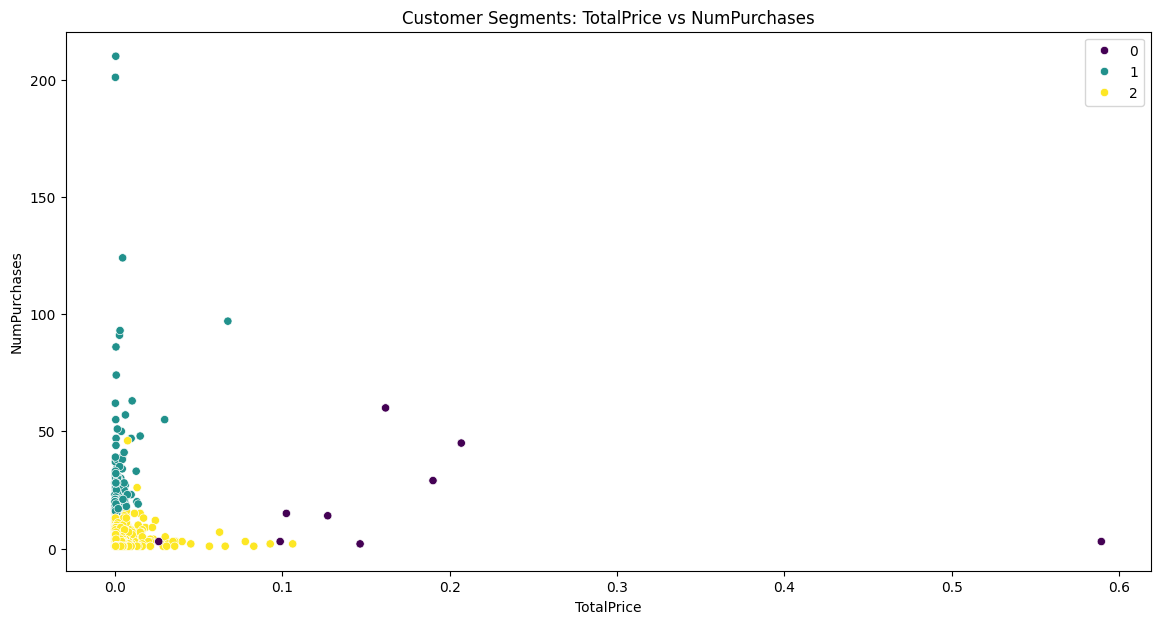

In [75]:
# Scatter plot for TotalPrice vs. NumPurchases
plt.figure(figsize=(14, 7))
sns.scatterplot(x='TotalPrice', y='NumPurchases', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segments: TotalPrice vs NumPurchases')
plt.xlabel('TotalPrice')
plt.ylabel('NumPurchases')
plt.legend()
plt.show()

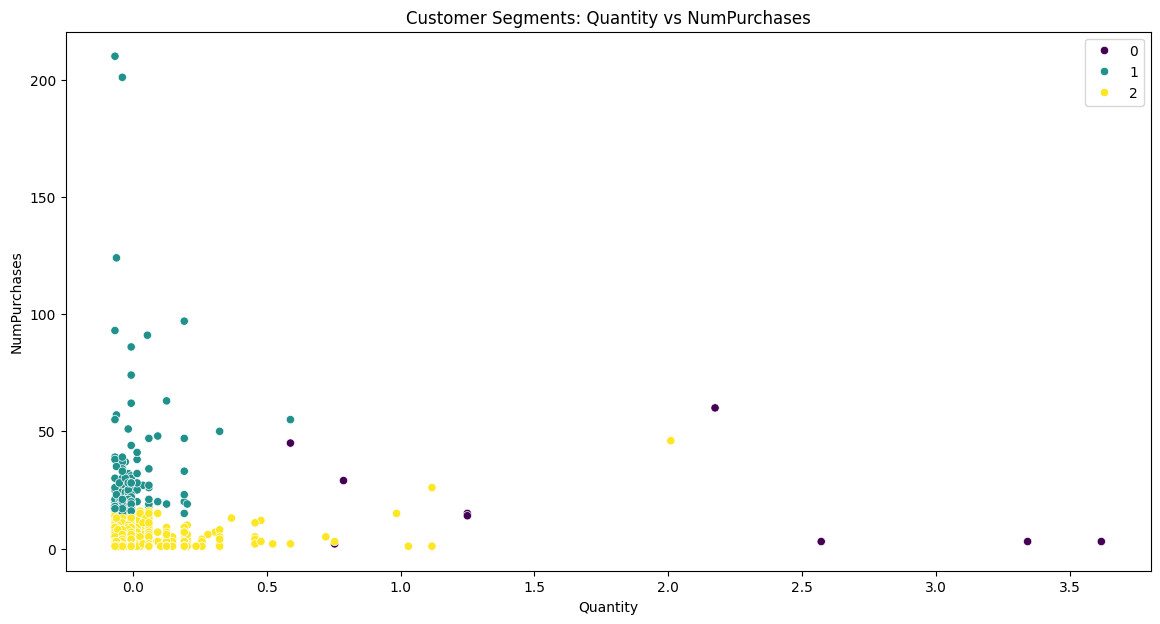

In [76]:
# Scatter plot for Quantity vs. NumPurchases
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Quantity', y='NumPurchases', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segments: Quantity vs NumPurchases')
plt.xlabel('Quantity')
plt.ylabel('NumPurchases')
plt.legend()
plt.show()

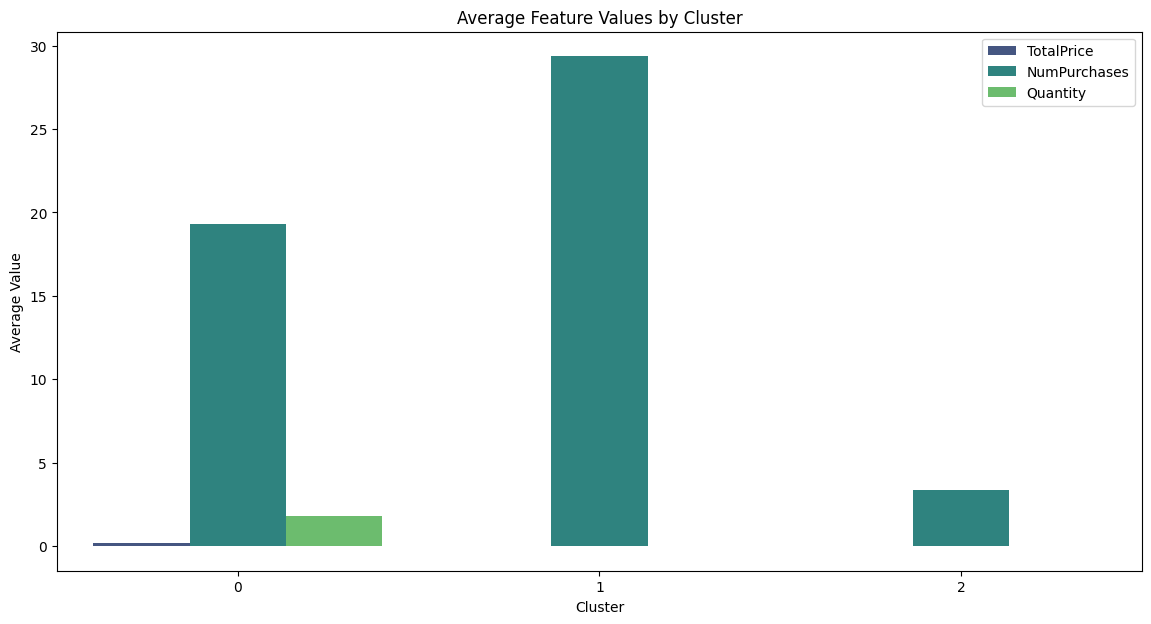

In [77]:
# Bar plot for the average values of each feature per cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'TotalPrice': 'mean',
    'NumPurchases': 'mean',
    'Quantity': 'mean'
}).reset_index()

cluster_summary_melted = pd.melt(cluster_summary, id_vars='Cluster', var_name='Feature', value_name='Average')

plt.figure(figsize=(14, 7))
sns.barplot(x='Cluster', y='Average', hue='Feature', data=cluster_summary_melted, palette='viridis')
plt.title('Average Feature Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend()
plt.show()

## 10.Summary Table

In [78]:
# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", "Optimal_Number_of_cluster"])

In [79]:
# Add rows to the table
myTable.add_row(['2', "K-Means with Elbow method","3"])
myTable.add_row(['4',"DBSCAN ","4"])
myTable.add_row(['3', "Hierarchical clustering","3"])


In [80]:
# Print the table
print(myTable)

+--------+---------------------------+---------------------------+
| SL No. |         Model_Name        | Optimal_Number_of_cluster |
+--------+---------------------------+---------------------------+
|   2    | K-Means with Elbow method |             3             |
|   4    |          DBSCAN           |             4             |
|   3    |  Hierarchical clustering  |             3             |
+--------+---------------------------+---------------------------+
